# 导入模块

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
from IPython.core.interactiveshell import InteractiveShell
import os

from snownlp import SnowNLP

mpl.rcParams["font.sans-serif"] = ["SimHei"]  # 设置表格标题中文字体
# InteractiveShell.ast_node_interactivity = "last_expr"

# 读取弹幕数据文件

In [2]:
csv_file = "./bullet/data_all.csv"
csv_data = pd.read_csv(csv_file, low_memory = False, index_col=0)  # 防止弹出警告
csv_df = pd.DataFrame(csv_data)
csv_df.head()

,uid,contentsId,contents,likeCount,tv_name
0,2017439560,1580010561365008245,看下去会被惊艳到的,8,1
1,1834316462,1582869545582003701,现在是二刷,4,1
2,1768998045,1578130987745009753,现在才发现开头是32唱片行,18,1
3,2423923372,1581029471043005559,曾之乔太美了,1,1
4,1220652758,1582344620722001918,有二刷选手吗！,5,1


# 查看数据

##  每集发送弹幕数，结合每集标题情感分析

In [3]:
user_count = csv_df.groupby("tv_name")["contents"].count().reset_index()
user_count.columns = ["集数","累计发送弹幕数"]
# print("评论用户数：{}".format( ,len(user_count))
user_count.head()


,集数,累计发送弹幕数
0,1,13761
1,2,14856
2,3,11933
3,4,15023
4,5,13392


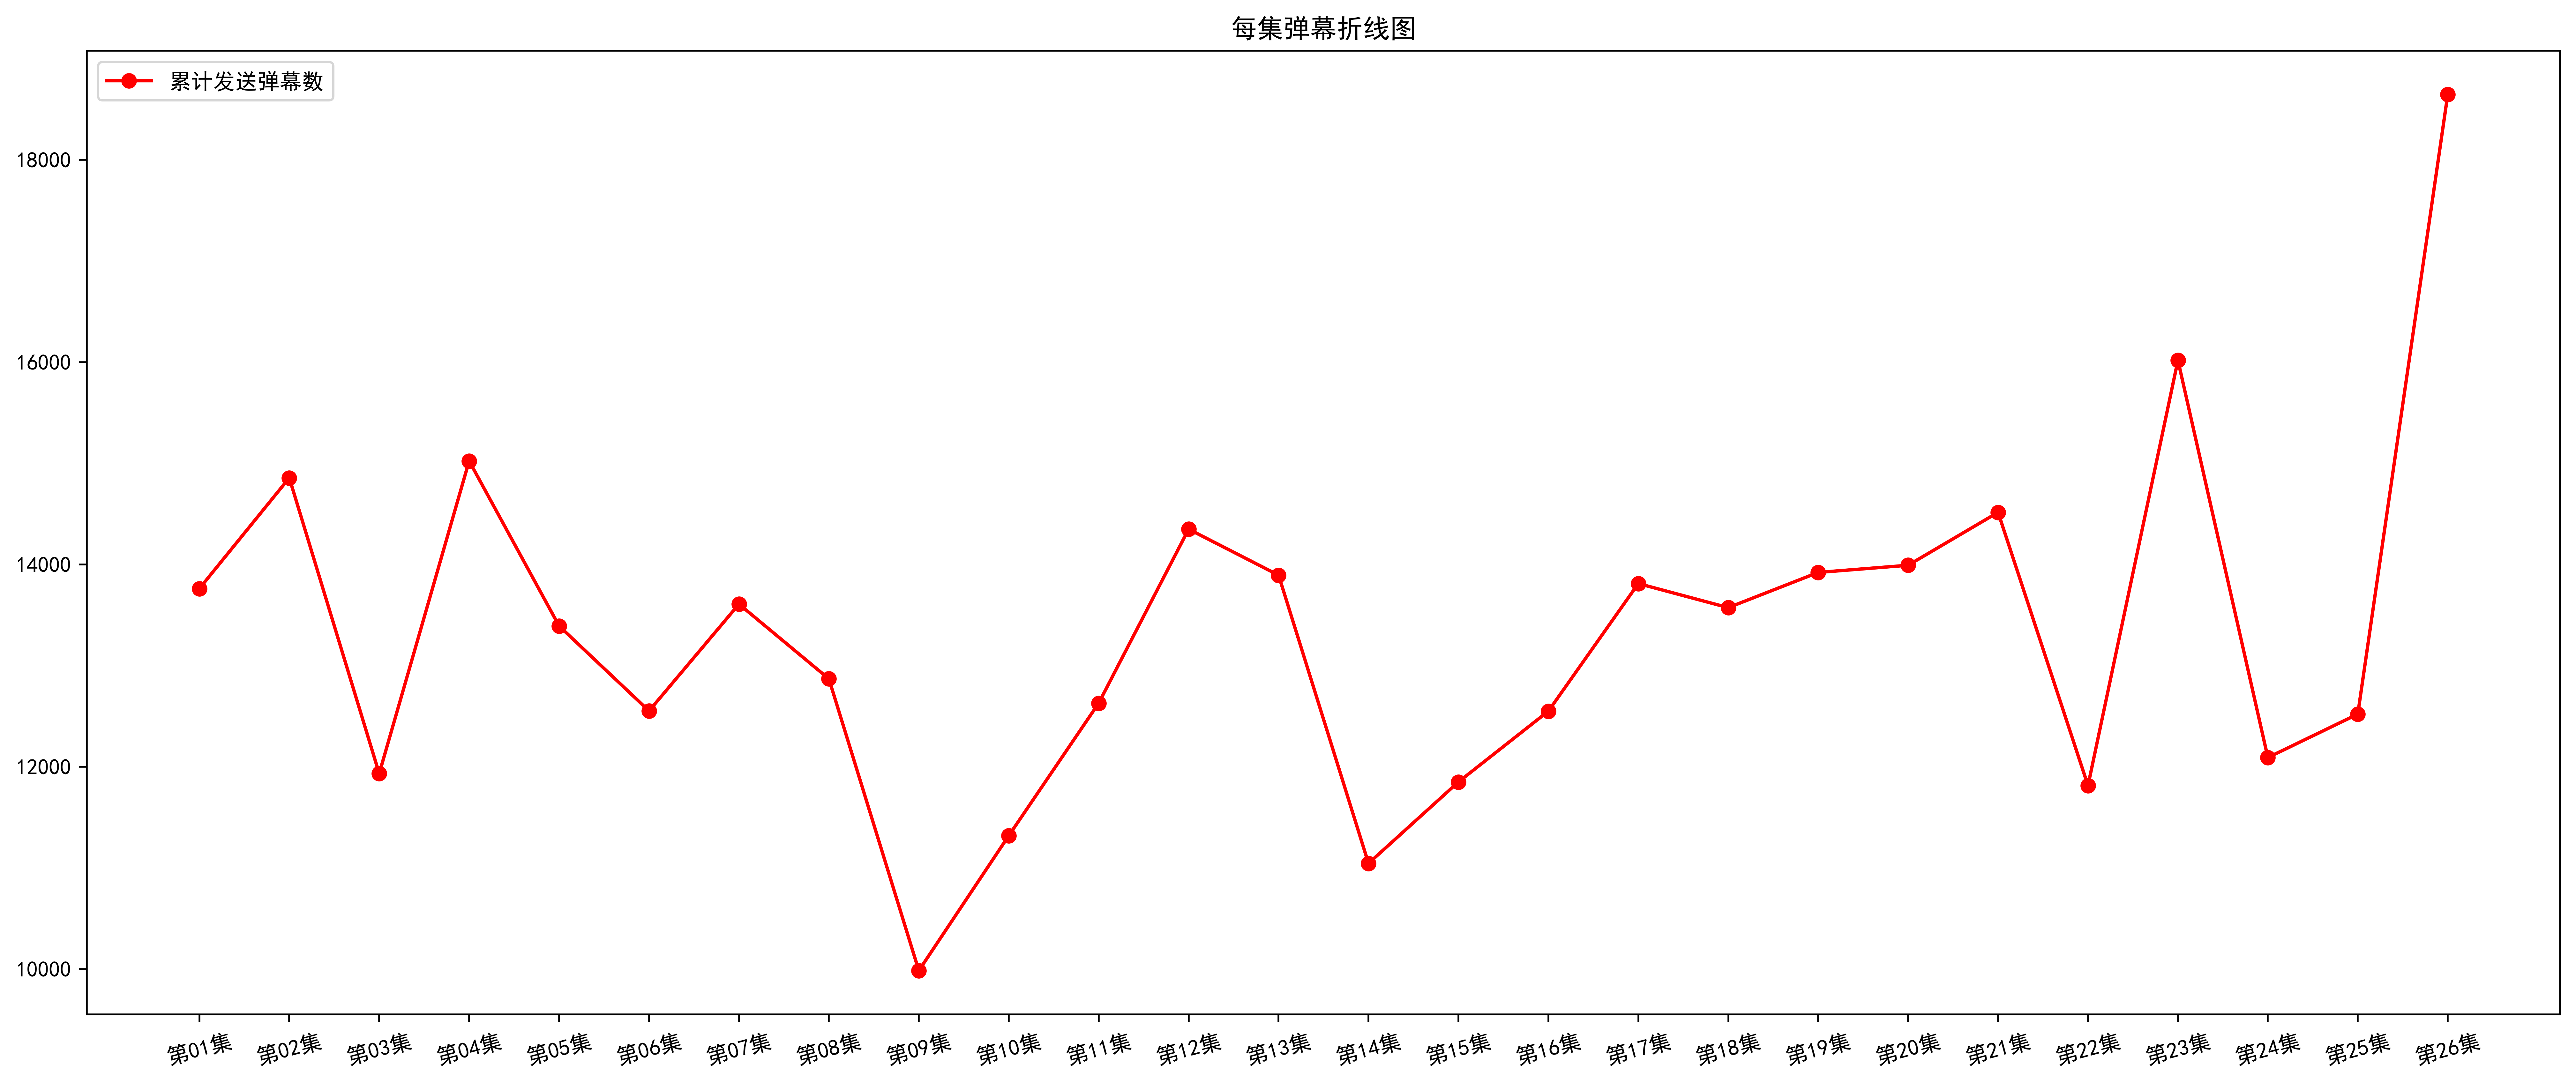

In [5]:
InteractiveShell.ast_node_interactivity = "last_expr"  # 屏蔽掉matplotlib输出的提示文字
# 创建画布
plt.figure(figsize=(20, 8), dpi=500)
# 折线图
user_count["累计发送弹幕数"].plot(kind='line',marker='o',color='r',title='每集弹幕折线图')
plt.plot(kind='line',marker='o',color='r',title='每集弹幕折线图')
# 构造x，y轴标签
x_ticks_label = ["第{}集".format("%.2d" % (i)) for i in user_count["集数"]]
plt.xticks(user_count.index[::1], x_ticks_label[::1], rotation=15)  # 设置x轴刻度间隔、旋转角度
# 绘制图例
plt.legend(loc="best")  # loc = "best", 0 , 1, 2, 3, 4, ...
if not os.path.exists("./pictures/"):
    os.makedirs("./pictures/")
# 保存图像
plt.savefig("./pictures/bullet_plot.png")

InteractiveShell.ast_node_interactivity = "last_expr"

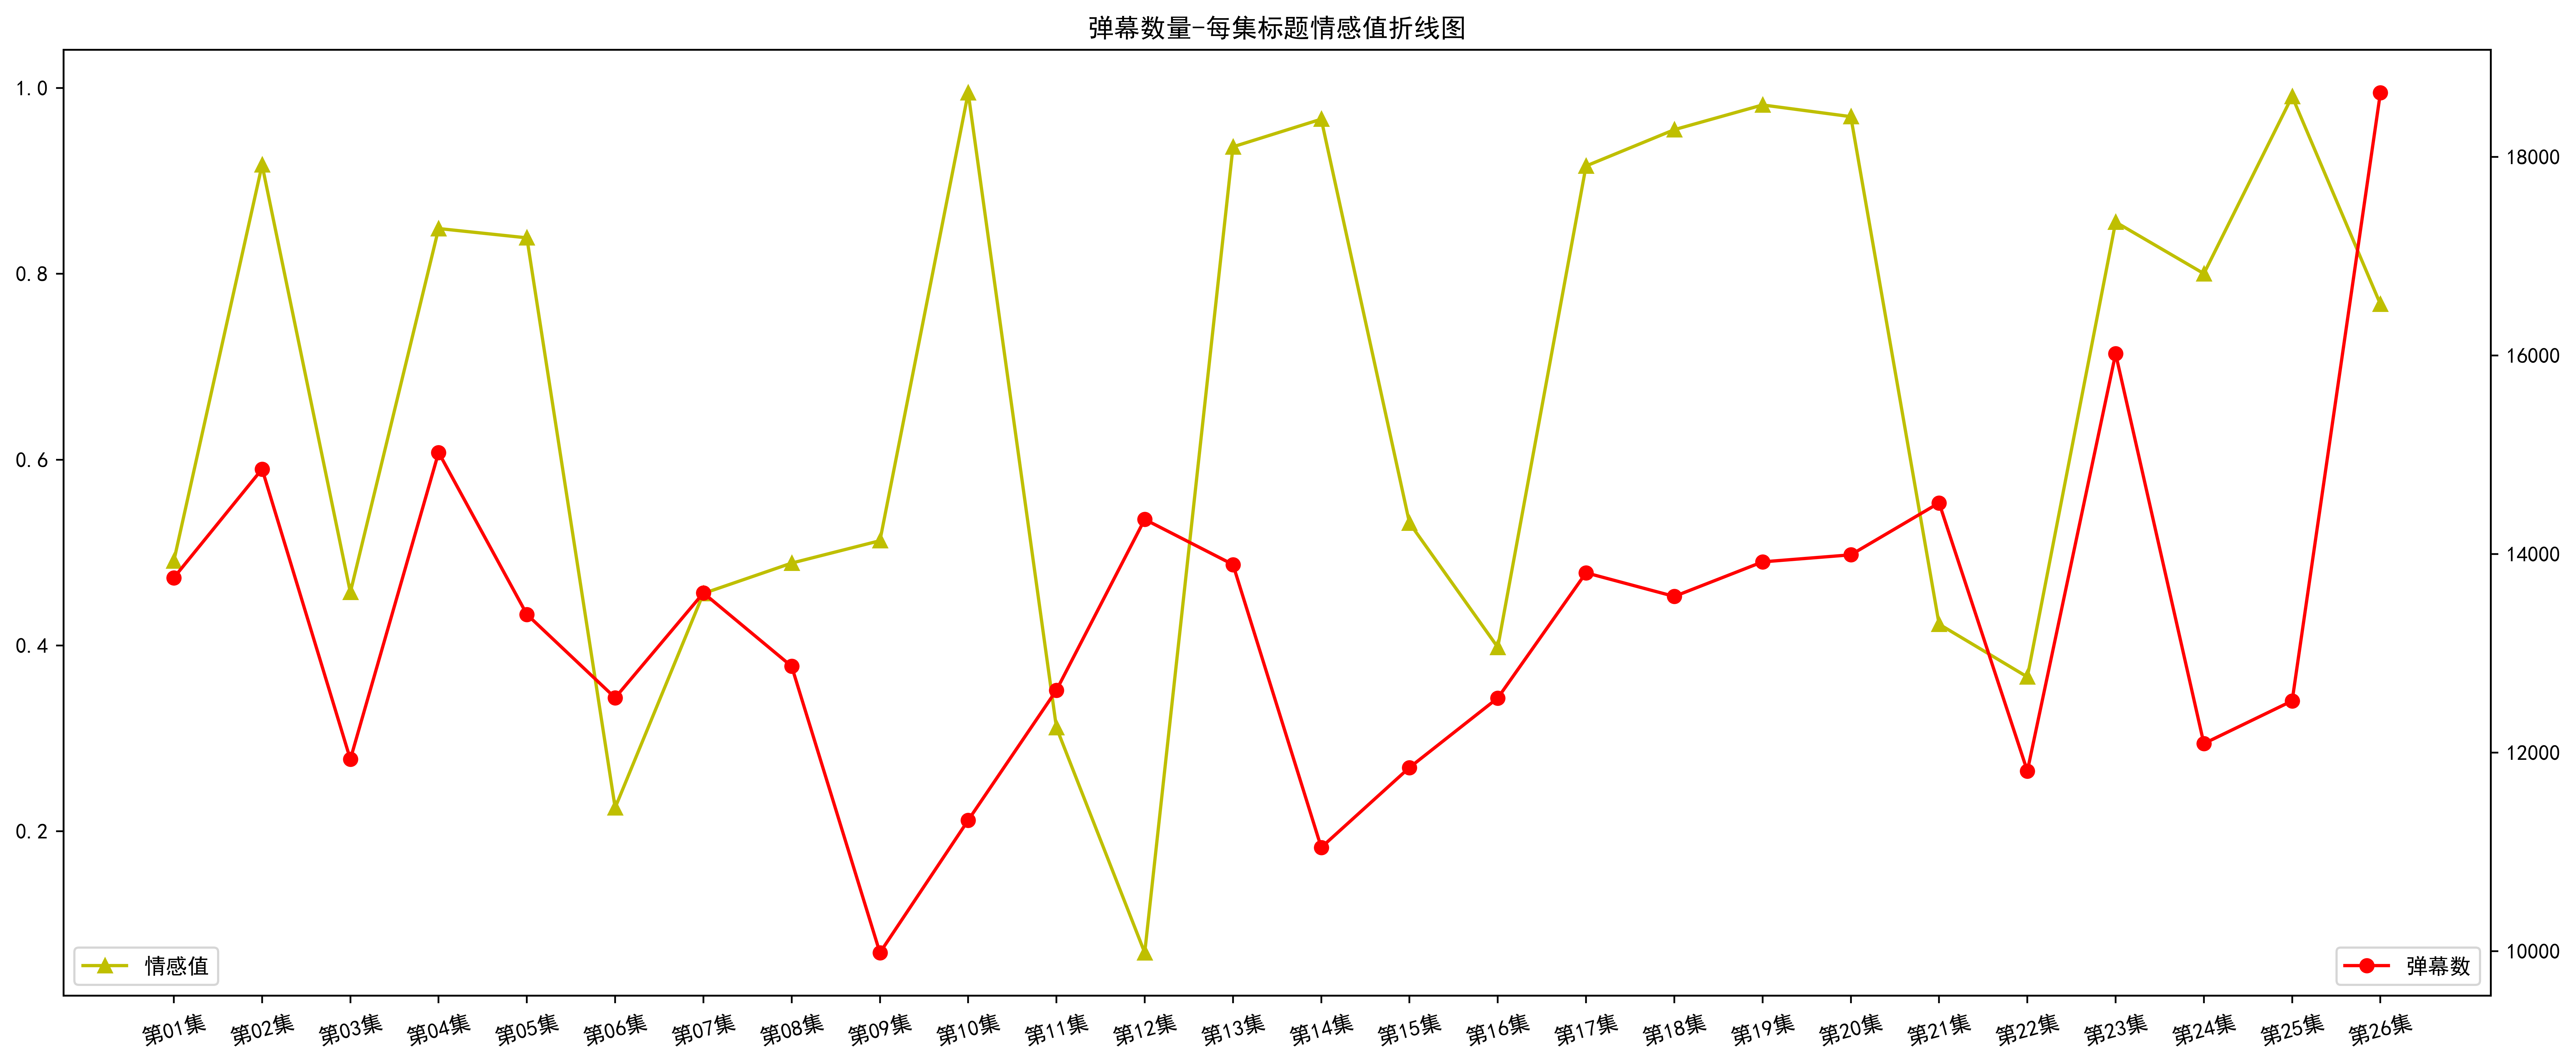

In [40]:
# 打开小标题文件
subtitle_mood = []
f1 = open(r'./bullet/subtitle.txt')
for i in f1:
    subtitle_mood.append(SnowNLP(i.strip()).sentiments)

# 情感走势
InteractiveShell.ast_node_interactivity = "last_expr"
# 创建画布
fig, axes = plt.subplots(figsize=(20, 8), dpi=500)
user_count.index
# 绘图
axes.plot(user_count.index, subtitle_mood, marker='^',color='y', label='情感值')
plt.legend(loc=3)
axes2 = axes.twinx()
axes2.plot(user_count.index, user_count["累计发送弹幕数"], marker='o',color='r', label='弹幕数')
plt.legend(loc=4)
# 构造x，y轴标签，标题
x_ticks_label = ["第{}集".format("%.2d" % (i)) for i in user_count["集数"]]
plt.xticks(user_count.index[::1], x_ticks_label[::1])  # 设置x轴刻度间隔
for xtick in axes.get_xticklabels():
    xtick.set_rotation(15)  # 旋转x轴
plt.title("弹幕数量-每集标题情感值折线图")

InteractiveShell.ast_node_interactivity = "last_expr"